In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
path_data = '../../../data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### Assessing Models ###
In data science, a "model" is a set of assumptions about data. Often, models include assumptions about chance processes used to generate data. 

Sometimes, data scientists have to decide whether or not their models are good. In this section we will discuss two examples of making such decisions. In later sections we will use the methods developed here as the building blocks of a general framework for testing hypotheses.

### U.S. Supreme Court, 1965: Swain vs. Alabama ###

In the early 1960's, in Talladega County in Alabama, a black man called Robert Swain was convicted of raping a white woman and was sentenced to death. He appealed his sentence, citing among other factors the all-white jury. At the time, only men aged 21 or older were allowed to serve on juries in Talladega County. In the county, 26% of the eligible jurors were black, but there were only 8 black men among the 100 selected for the jury panel in Swain's trial. No black man was selected for the trial jury.

In 1965, the Supreme Court of the United States denied Swain's appeal. In its ruling, the Court wrote "... the overall percentage disparity has been small and reflects no studied attempt to include or exclude a specified number of Negroes."

Jury panels are supposed to be selected at random from the eligible population. Because 26% of the eligible population was black, 8 black men on a panel of 100 might seem low.

### A Model ###
But one view of the data – a model, in other words – is that the panel was selected at random and ended up with a small number of black men just due to chance. This model is consistent with what the Supreme Court wrote in its ruling.

The model specifies the details of a chance process. It says the data are like a random sample from a population in which 26% of the people are black. We are in a good position to assess this model, because:
- We can simulate data based on the model. That is, we can simulate drawing at random from a population of whom 26% are black. 
- Our simulation will show what a panel *would* look like *if* it were selected at random.
- We can then compare the results of the simulation with the composition of Robert Swain's panel. 
- If the results of our simulation are not consistent with the composition of Swain's panel, that will be evidence against the model of random selection.

Let's go through the process in detail. 

### The Statistic ###
First, we have to choose a statistic to simulate. The statistic has to be able to help us decide between the model and alternative views about the data. The model says the panel was drawn at random. The alternative viewpoint, suggested by Robert Swain's appeal, is that the panel was not drawn at random because it contained too few black men. A natural statistic, then, is the number of black men in our simulated sample of 100 men representing the panel. Small values of the statistic will favor the alternative viewpoint.

### Predicting the Statistic Under the Model ###
If the model were true, how big would the statistic typically be? To answer that, we have to start by working out the details of the simulation. 

#### Generating One Value of the Statistic ####
First let's figure out how to simulate one value of the statistic. For this, we have to sample 100 times at random from the population of eligible jurors and count the number of black men we get.

One way is to set up a table representing the eligible population and use `sample` as we did in the previous chapter. But there is also a quicker way, using a `datascience` function tailored for sampling at random from categorical distributions. We will use it several times in this chapter.

The `sample_proportions` function in the `datascience` library takes two arguments:
- the sample size
- the distribution of the categories in the population, as a list or array of proportions that add up to 1

It returns an array containing the distribution of the categories in a random sample of the given size taken from the population. That's an array consisting of the sample proportions in all the different categories.

To see how to use this, remember that according to our model, the panel is selected at random from a population of men among whom 26% were black and 74% were not. Thus the distribution of the two categories can be represented as the list `[0.26, 0.74]`, which we have assigned to the name `eligible_population`. Now let's sample at random 100 times from this distribution, and see what proportions of the two categories we get in our sample.

In [68]:
eligible_population = [0.26, 0.74]
sample_proportions(326, eligible_population)

array([0.2392638, 0.7607362])

That was easy! The proportion of black men in the random sample is `item(0)` of the output array.

Because there are 100 men in the sample, the number of men in each category is 100 times the proportion. So we can just as easily simulate counts instead of proportions, and access the count of black men only. 

Run the cell a few times to see how the output varies.

In [69]:
# count of black men in a simulated panel

(100 * sample_proportions(100, eligible_population)).item(0)

22.0

#### Running the Simulation ####
To get a sense of the variability without running the cell over and over, let's generate 10,000 simulated values of the count. The code follows the same steps that we have used in every simulation.

In [79]:
counts = make_array()

repetitions = 100000
for i in np.arange(repetitions):
    simulated_count = (100 * sample_proportions(100, eligible_population)).item(0)
    counts = np.append(counts, simulated_count)

### The Prediction ###
To interpret the results of our simulation, we start as usual by visualizing the results by an empirical histogram.

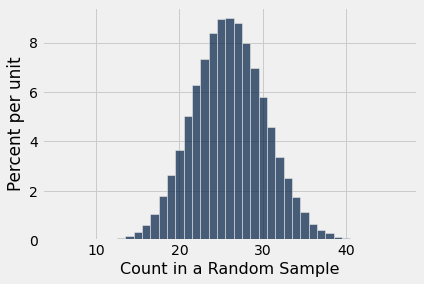

In [80]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))

In [83]:
sum(counts<13)

55

The histogram tells us what the model of random selection predicts about our statistic, the count of black men in the sample.

To generate each simulated count, we drew at 100 times at random from a population in which 26% were black. So, as you would expect, most of the simulated counts are around 26. They are not exactly 26 – there is some variation. The counts range between about 10 and 45. 

### Comparing the Prediction and the Data ###
Though the simulated counts are quite varied, very few of them came out to be eight or less. The value eight is far out in the left hand tail of the histogram. It's the red dot on the horizontal axis of the histogram.

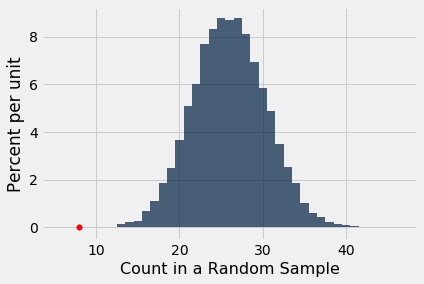

In [7]:
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.scatter(8, 0, color='red', s=30);

Thus the simulation shows that if we select a panel of 100 jurors at random from the eligible population, we are very unlikely to get counts of black men as low as the eight that were in Swain's jury panel. This is evidence that the model of random selection of the jurors in the panel is not consistent with the data from the panel. 

When the data and a model are inconsistent, the model is hard to justify. After all, the data are real. The model is just a set of assumptions. When assumptions are at odds with reality, we have to question those assumptions.

While it is *possible* that a panel like Robert Swain's could have been generated by chance, our simulation demonstrates that it is very unlikely. Thus our assessment is that the model of random draws is not supported by the evidence. Swain's jury panel does not look like the result of random sampling from the population of eligible jurors.

This method of assessing models is very general. Here is an example in which we use it to assess a model in a completely different setting.

### Mendel's Pea Flowers ###
[Gregor Mendel](https://en.wikipedia.org/wiki/Gregor_Mendel) (1822-1884) was an Austrian monk who is widely recognized as the founder of the modern field of genetics. Mendel performed careful and large-scale experiments on plants to come up with fundamental laws of genetics. 

Many of his experiments were on varieties of pea plants. He formulated sets of assumptions about each variety; these were his models. He then tested the validity of his models by growing the plants and gathering data.

Let's analyze the data from one such experiment to see if Mendel's model was good.

In a particular variety, each plant has either purple flowers or white. The color in each plant is unaffected by the colors in other plants. Mendel hypothesized that the plants should bear purple or white flowers at random, in the ratio 3:1. 

### Mendel's Model ###
For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.

#### Approach to Assessment ####
To go about assessing Mendel's model, we can simulate plants under the assumptions of the model and see what it predicts. Then we will be able to compare the predictions with the data that Mendel recorded.

### The Statistic ####
Our goal is to see whether or not Mendel's model is good. We need to simulate a statistic that will help us make this decision. 

If the model is good, the percent of purple-flowering plants in the sample should be close to 75%. If the model is not good, the percent purple-flowering will be away from 75%. It may be higher, or lower; the direction doesn't matter.

The key for us is the *distance* between 75% and the percent of purple-flowering plants in the sample. Big distances are evidence that the model isn't good.

Our statistic, therefore, is the **distance between the sample percent and 75%**:

$$
\big{\vert} \text{sample percent of purple-flowering plants} - 75 \big{\vert}
$$

### Predicting the Statistic Under the Model ###
To see how big the distance would be if Mendel's model were true, we can use `sample_proportions` to simulate the distance under the assumptions of the model.

First, we have to figure out how many times to sample. To do this, remember that we are going to compare our simulation with Mendel's plants. So we should simulate the same number of plants that he had.

Mendel grew a lot of plants. There were 929 plants of the variety corresponding to this model. So we have to sample 929 times. 

#### Generating One Value of the Statistic ####

The steps in the calculation:

- Sample 929 times at random from the distribution specified by the model and find the sample proportion in the purple-flowering category. 
- Multiply the proportion by 100 to get a pecent.
- Subtract 75 and take the absolute value of the difference.

That's the statistic: the distance between the sample percent and 75.

In [94]:
model_proportions = [0.75, 0.25]
abs(100 * sample_proportions(929, model_proportions).item(0) - 75)

3.202368137782557

That's one simulated value of the distance between the sample percent of purple-flowering plants and 75% as predicted by Mendel's model. 

#### Running the Simulation ####
To get a sense of how variable the distance could be, we have to simulate it many more times.
We will generate 10,000 values of the distance.

In [95]:
distances = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    one_distance = abs(100 * sample_proportions(929, model_proportions).item(0) - 75)
    distances = np.append(distances, one_distance)

### The Prediction ###
The empirical histogram of the simulated values shows the distribution of the distance as predicted by the model.

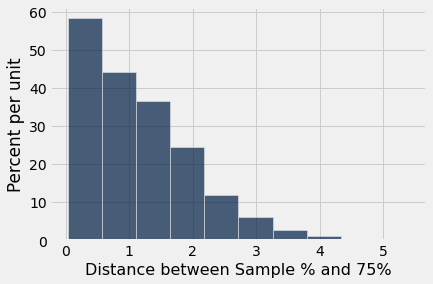

In [96]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()

Look on the horizontal axis to see the typical values of the distance, as predicted by the model. They are rather small. For example, a high proportion of the distances are in the range 0 to 1, meaning that for a high proportion of the samples, the percent of purple-flowering plants is within 1% of 75%, that is, the sample percent is in the range 74% to 76%.

### Comparing the Prediction and the Data ###
To assess the model, we have to compare this prediction with the data. Mendel recorded the number of purple and white flowering plants. Among the 929 plants that he grew, 705 were purple flowering. That's just about 75.89%.

In [11]:
705 / 929

0.7588805166846071

So the observed value of our statistic – the distance between Mendel's sample percent and 75 – is about 0.89:

In [12]:
observed_statistic = abs (100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

Just by eye, locate roughly where 0.89 is on the horizontal axis of the histogram. You will see that it is clearly in the heart of the distribution predicted by Mendel's model.

The cell below redraws the histogram with the observed value plotted on the horizontal axis.

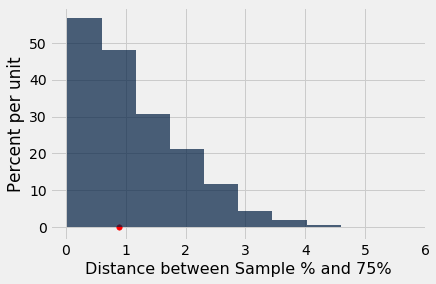

In [13]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.scatter(observed_statistic, 0, color='red', s=30);

The observed statistic is like a typical distance predicted by the model. By this measure, the data are consistent with the histogram that we generated under the assumptions of Mendel's model. This is evidence in favor of the model.